#### 1. 社交网络构建与分析

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import json

with open(r"C:\Users\34065\Desktop\mpy\myhomework\data\hw4_data.json") as f:#读取数据
    data = f.read()
data = json.loads(data)
#采用字典法存图
class graph:
    def __init__(self,mydata:dict):
        self.Ims=dict() #影响力分数
        self.edge=dict() #边，格式为{a,[(b,c]}}表示a连向b连接强度为c
        self.d=dict()
        self.node = list()
        for x in mydata['nodes']:
            self.Ims[x[0]]=x[1]
            self.d[x[0]] = 0
            self.edge[x[0]]=list()
            self.node.append(x[0])
        for x in mydata['edges']:
            self.edge[x[0]].append((x[1],x[2]))
            self.edge[x[1]].append((x[0],x[2]))
            self.d[x[0]]+=1
            self.d[x[1]]+=1

g=graph(data)

#列出每个用户的直接朋友
friends = dict()
for x in g.edge:
    friends[x]=list()
    for y in g.edge[x]:
        friends[x].append(y[0])
for key,val in friends.items():
    print("姓名 : {} \n朋友 : {}".format(key,val))

姓名 : Yanyan-Wang 
朋友 : ['Aarebecca', 'pomelo-nwu', 'yangzy0603', 'tyn1998', 'yvonneyx', 'lidongze0629', 'RackweLLizm', 'yikenie', 'yubo0923', 'Maple0817', 'wj23027', 'frank-zsy', 'andyhuang18', 'bifenglin']
姓名 : Aarebecca 
朋友 : ['Yanyan-Wang', 'pomelo-nwu', 'yangzy0603', 'yvonneyx', 'lidongze0629', 'tyn1998', 'RackweLLizm', 'yikenie', 'yubo0923', 'Maple0817', 'frank-zsy']
姓名 : pomelo-nwu 
朋友 : ['Yanyan-Wang', 'Aarebecca', 'yangzy0603', 'tyn1998', 'lidongze0629', 'yvonneyx', 'RackweLLizm', 'yikenie', 'bifenglin', 'frank-zsy', 'yubo0923', 'wj23027', 'andyhuang18', 'Maple0817', 'will-ww', 'zhicheng-ning', 'PureNatural', 'xiaoya-yaya', 'xgdyp', 'longyanz', 'Zzzzzhuzhiwei', 'birdflyi', 'lhbvvvvv', 'zhaosj975']
姓名 : tyn1998 
朋友 : ['andyhuang18', 'pomelo-nwu', 'frank-zsy', 'wj23027', 'bifenglin', 'Yanyan-Wang', 'will-ww', 'Zzzzzhuzhiwei', 'lhbvvvvv', 'zhicheng-ning', 'PureNatural', 'yangzy0603', 'xgdyp', 'stevending1st', 'wxharry', 'Aarebecca', 'birdflyi', 'xiaoya-yaya', 'pranavshuklaa', 'lid

#### 2. 统计与度中心性分析  
a. 计算每个用户的度数（即直接朋友数量），列出度数最多的前5个用户及其朋友数量。  
b. 通过影响力分数（如上所示），找出影响力最高的前5个用户。  
c. 综合考虑影响力分数和朋友数量，列出对社交网络最有影响力的用户（可以选择将两者按一定比例加权，例如影响力得分的50%和朋友数量的50%）。

##### 实现方法：利用优先队列，分别按度数，影响力分数，加权分数建立三个大根堆即可

In [2]:
from queue import PriorityQueue #导入优先级队列库
q1 = PriorityQueue() #度
q2 = PriorityQueue() #影响力
q3 = PriorityQueue() #加权分数

for key,val in g.edge.items():
    q1.put((-len(val),key)) #python优先队列是越小优先级越高，故权值设置为相反数即可
    q2.put((-g.Ims[key],key))
    q3.put((-(len(val)+g.Ims[key])/2,key))
print("直接朋友最多的五个用户：")
for i in range(5):
    item = q1.get()
    print("姓名：{}，朋友数：{}".format(item[1],-item[0]))
print()
print("影响力最高的五个用户：")
for i in range(5):
    item = q2.get()
    print("姓名：{}，影响力：{}".format(item[1],-item[0]))
print()
print("最有影响力的用户：")
item = q3.get()
print("姓名：{}，综合影响力：{}".format(item[1],-item[0]))

直接朋友最多的五个用户：
姓名：frank-zsy，朋友数：30
姓名：tyn1998，朋友数：30
姓名：pomelo-nwu，朋友数：24
姓名：andyhuang18，朋友数：23
姓名：wj23027，朋友数：23

影响力最高的五个用户：
姓名：Yanyan-Wang，影响力：50.95
姓名：Aarebecca，影响力：23.82
姓名：pomelo-nwu，影响力：22.36
姓名：tyn1998，影响力：16.64
姓名：frank-zsy，影响力：15.8

最有影响力的用户：
姓名：Yanyan-Wang，综合影响力：32.475


#### 3. 推荐新朋友
##### a. 对于用户 Yanyan-Wang，请找出其“朋友的朋友”中最有可能成为新朋友的用户，并列出推荐的理由（例如有最多共同的朋友）。

In [3]:
#我们按共同朋友数量来为Yanyan-Wang推荐新朋友
mufriends = dict() #与Yanyan-Wang的共同朋友，{a,b}表示与a有b个共同朋友
excep = set() #用来排除Yanyan-Wang与他的朋友
#初始化
excep.add('Yanyan-Wang')
for item in g.edge['Yanyan-Wang']:
    excep.add(item[0])
for key in g.Ims.keys():
    if key not in excep:
        mufriends[key] = 0

#开始遍历
for item in g.edge['Yanyan-Wang']:
    for item2 in g.edge[item[0]]:
        if item2[0] not in excep:
            mufriends[item2[0]] += 1

#将元素存入优先队列
findfriend = PriorityQueue()
for key,val in mufriends.items():
    findfriend.put((-val,key))
while not findfriend.empty():
    item = findfriend.get()
    #print(item)
    print("用户：{}，共同朋友数：{}".format(item[1],-item[0]))


用户：PureNatural，共同朋友数：6
用户：Zzzzzhuzhiwei，共同朋友数：6
用户：birdflyi，共同朋友数：6
用户：lhbvvvvv，共同朋友数：6
用户：longyanz，共同朋友数：6
用户：will-ww，共同朋友数：6
用户：xgdyp，共同朋友数：6
用户：xiaoya-yaya，共同朋友数：6
用户：zhaosj975，共同朋友数：6
用户：zhicheng-ning，共同朋友数：6
用户：stevending1st，共同朋友数：5
用户：Vlad116，共同朋友数：4
用户：kunal8411，共同朋友数：4
用户：pranavshuklaa，共同朋友数：4
用户：stealth-bombeer，共同朋友数：4
用户：wxharry，共同朋友数：4


所以我们按顺序推荐：PureNatural，Zzzzzhuzhiwei······等人。

##### b. 考虑用户之间的连接强度，找出与 Yanyan-Wang 连接强度最高的5个用户（无论是否已经是直接朋友），并列出推荐排序。
##### //这里我认为不直接相连的用户的连接强度为从一个用户到另一个用户的 所有路径上的连接强度最小值的 最大值。

In [4]:
#这里用dijskra算法实现，求出所有用户与Yanyan-Wang的连接强度
from queue import Queue
inf = 1e18 #与自己的连接强度记为无穷
d = dict() #记录连接强度
vis = dict() #记录下次是否还要访问
def init():#初始化d，vis
    for item in g.Ims.keys():
        d[item] = 0
        vis[item] = 0
def dijskra(start):
    q = Queue()
    d[start] = inf
    q.put(start)
    while not q.empty() :
        x = q.get()
        vis[x] = 1
        for item in g.edge[x]:
            if vis[item[0]] == 1:
                continue
            if d[item[0]] < min(d[x],item[1]):
                d[item[0]] = min(d[x],item[1])
                q.put(item[0])
def show(arr:list):
    print("与 Yanyan-Wang 连接强度最高的5个用户：")
    for i in range(1,6):
        print('名字：{}，连接强度：{}'.format(arr[i][0],arr[i][1]))
    print()
    print("推荐列表：")
    for i in range(1,len(arr)-1):
        print("{}:{}".format(i,arr[i][0]))
init()
dijskra('Yanyan-Wang')
dis = sorted(d.items(),key=lambda k:k[1],reverse=True)
show(dis)

与 Yanyan-Wang 连接强度最高的5个用户：
名字：Aarebecca，连接强度：25.3
名字：pomelo-nwu，连接强度：25.09
名字：yangzy0603，连接强度：13.85
名字：tyn1998，连接强度：12.48
名字：andyhuang18，连接强度：12.48

推荐列表：
1:Aarebecca
2:pomelo-nwu
3:yangzy0603
4:tyn1998
5:andyhuang18
6:frank-zsy
7:wj23027
8:will-ww
9:zhicheng-ning
10:bifenglin
11:Zzzzzhuzhiwei
12:xgdyp
13:lidongze0629
14:lhbvvvvv
15:PureNatural
16:yvonneyx
17:xiaoya-yaya
18:birdflyi
19:stevending1st
20:wxharry
21:RackweLLizm
22:yikenie
23:pranavshuklaa
24:longyanz
25:yubo0923
26:stealth-bombeer
27:Maple0817
28:Vlad116
29:zhaosj975


#### 4. 网络图的可视化
##### a. 使用图论可视化工具绘制用户关系网络图，展示关键用户和他们的连接情况。
##### b. 你可以对图中的节点按“影响力得分”进行着色，节点的大小则代表度数，尝试解释在图中哪些用户在社交网络中最具影响力。

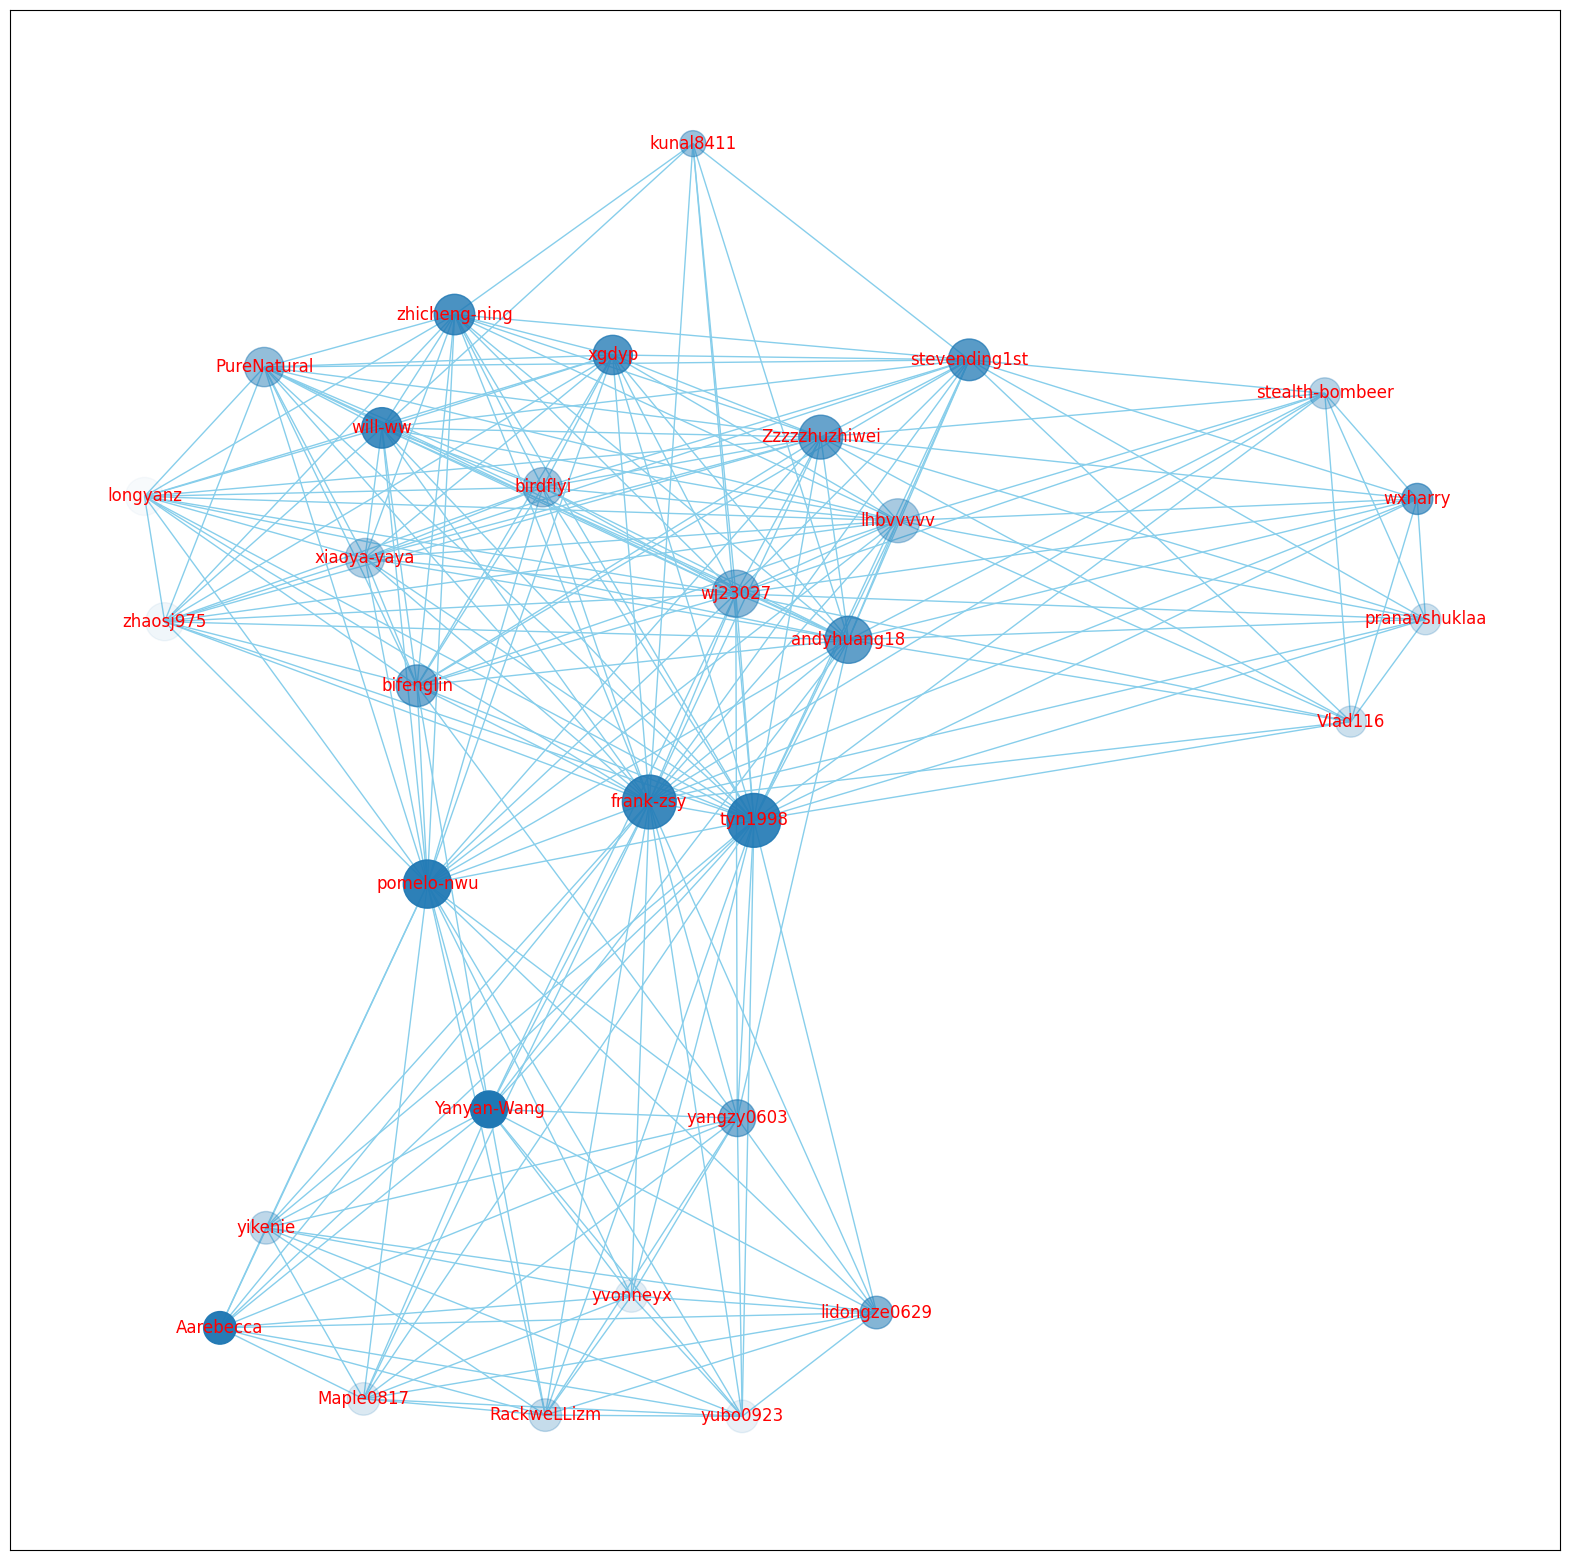

In [5]:
G = nx.Graph() #建图
#print(g.Ims.values())
base_size = 50
step = 1/len(g.Ims)
arr1 = list(g.Ims.values())
tmp1 = dict()
arr1.sort()
for i in range(0,len(g.Ims)):
    tmp1[arr1[i]] = i+1

base_alpha = 1/max(g.Ims.values())
#print(base_alpha)
#添加节点
for item in data['nodes']:
    G.add_node(item[0],ims = item[1])
for item in data['edges']:
    G.add_edge(item[0],item[1],len = item[2])
dre = dict(G.degree()).values() #度
plt.figure(figsize=(20,20))
#nx.draw(G,with_labels=True,font_color='r',node_size=[base_size*v for v in dre],edge_color = 'g')
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G,pos=pos,node_size=[base_size*v for v in dre],alpha=[step*tmp1[v] for v in g.Ims.values()])
nx.draw_networkx_labels(G,pos=pos,font_color='r')
nx.draw_networkx_edges(G,pos=pos,edge_color='skyblue')
plt.show()

##### 上图中，结点颜色越深代表其影响力越大